In [29]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.impute import KNNImputer


In [30]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
randomstate = 69420


x = pd.read_csv("X_train.csv").drop("id", axis=1)
y = pd.read_csv("y_train.csv").drop("id", axis=1)


KeyboardInterrupt: 

In [ ]:
x = x.iloc[:, :2458]

<bound method NDFrame.describe of        x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  x2448  x2449  \
0     -13   -9   -6   -4    0    2    6   12   23   35  ...    -33    -37   
1     -34  110  249  390  527  639  721  777  823  845  ...    -69    -64   
2     -34  -36  -37  -39  -41  -42  -44  -46  -48  -51  ...     12     16   
3     292  298  303  310  320  336  354  377  405  419  ...    424    293   
4     157  179  195  210  217  222  226  228  231  233  ...      3      6   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
5112 -247 -271 -285 -303 -334 -376 -413 -432 -443 -451  ...    119    131   
5113   62   62   61   61   61   61   61   61   61   62  ...    -69    -71   
5114  -95 -110 -124 -131 -126 -114  -95  -67  -42  -23  ...   -109   -106   
5115  -50  -48  -45  -42  -38  -35  -32  -30  -28  -26  ...    -26    -24   
5116   66   65   63   62   65   72   80   84   87   90  ...    -44    -52   

      x2450  x2451  x2452  x2453  x2454  

y    0
Name: 0, dtype: int64


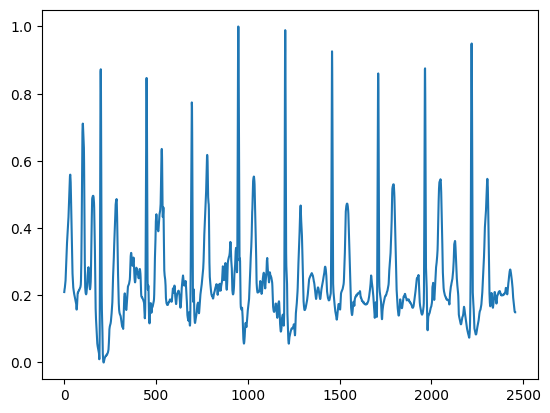

y    0
Name: 1, dtype: int64


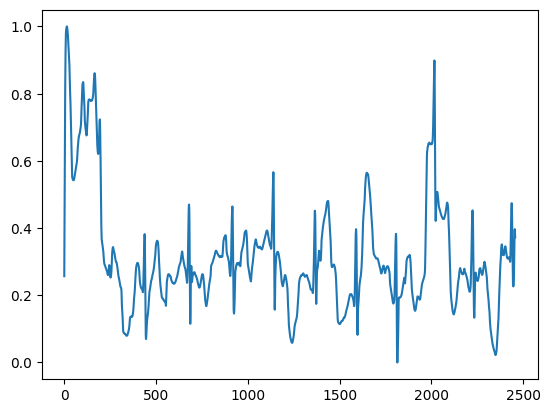

y    0
Name: 2, dtype: int64


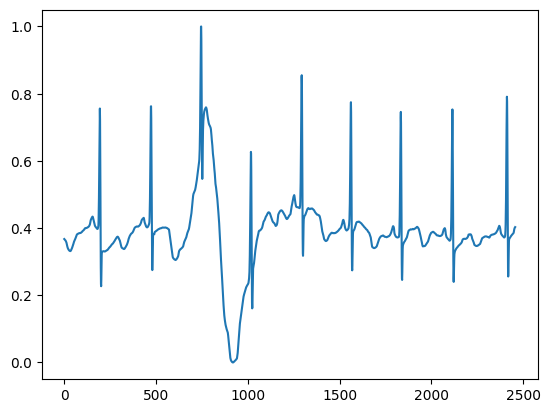

y    1
Name: 3, dtype: int64


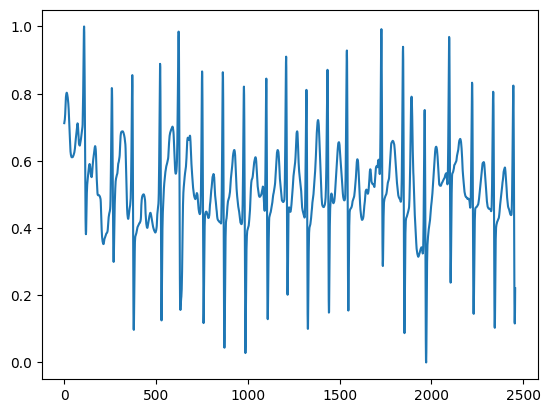

y    2
Name: 4, dtype: int64


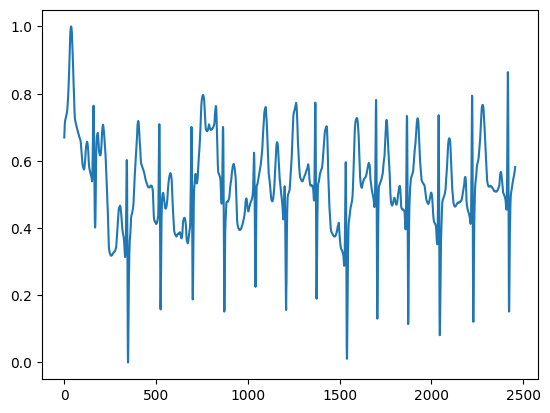

y    1
Name: 5, dtype: int64


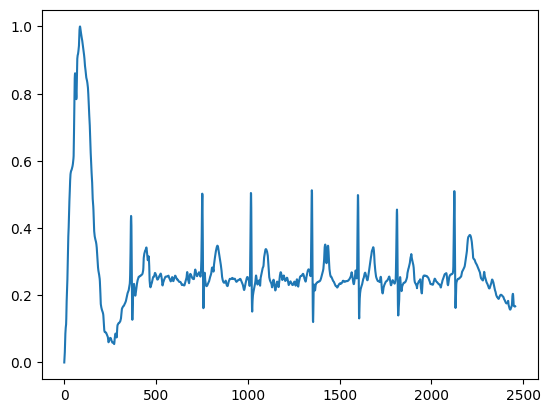

y    0
Name: 6, dtype: int64


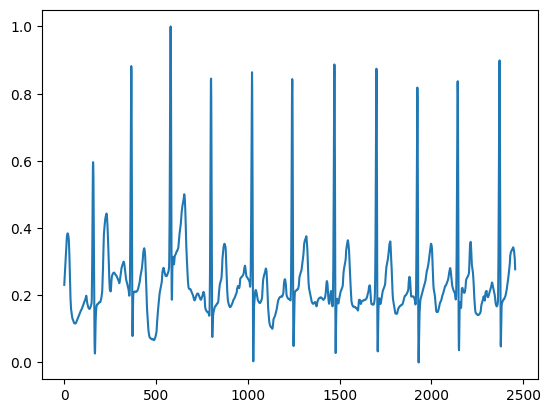

y    1
Name: 7, dtype: int64


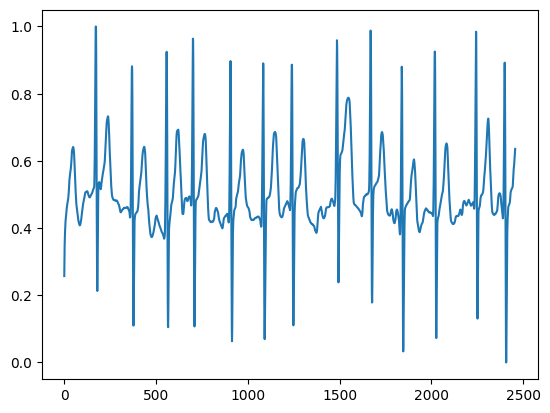

y    2
Name: 8, dtype: int64


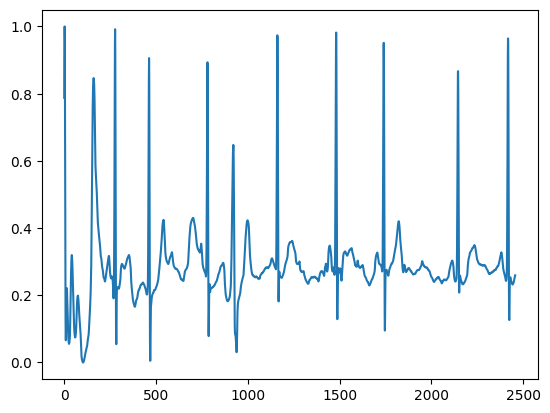

y    0
Name: 9, dtype: int64


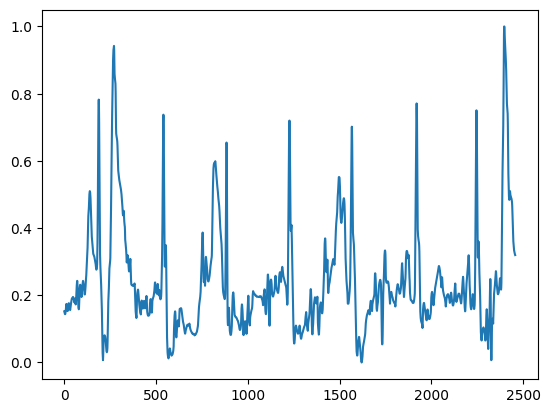

In [ ]:
for i in range(10):
    first = list(x.iloc[i])
    print(y.iloc[i])
    plt.plot(first)
    plt.show()


In [ ]:
test = x.to_numpy()
x = []
for line in test:
    x.append([(i, value) for i, value in enumerate(line)])
x = np.array(x)

(2458, 2)


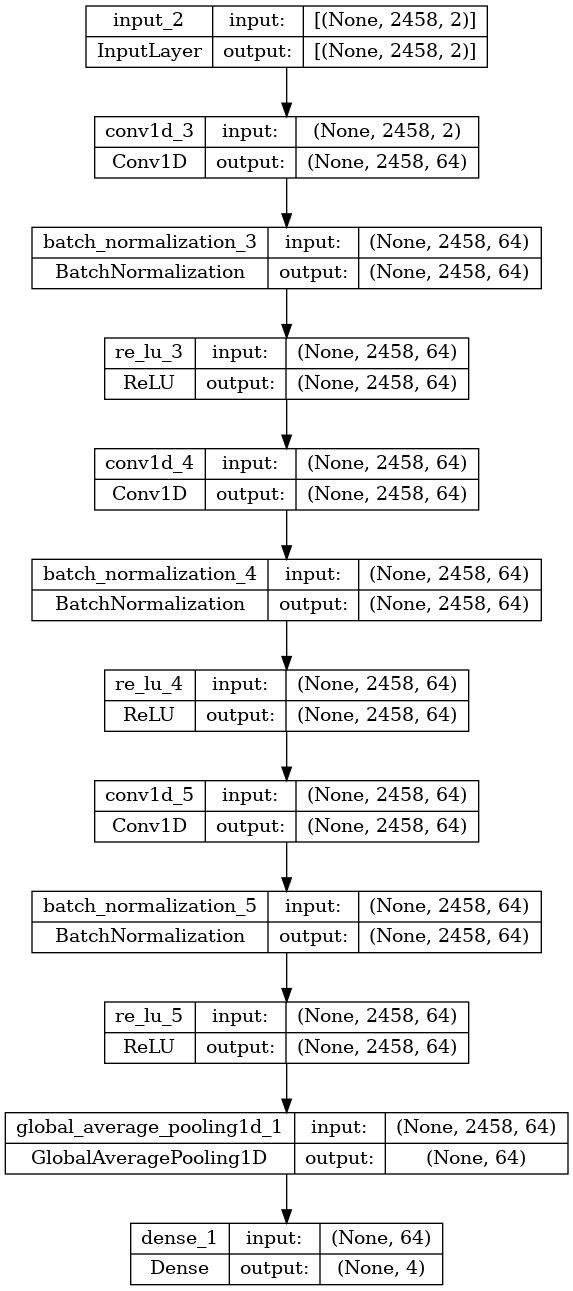

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(4, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

print(x.shape[1:])
model = make_model(input_shape=x.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 100
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x,
    y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/100
128/128 [==============================] - 3s 14ms/step - loss: 1.0192 - sparse_categorical_accuracy: 0.5876 - val_loss: 1.0584 - val_sparse_categorical_accuracy: 0.5801 - lr: 0.0010
Epoch 2/100
 12/128 [=>............................] - ETA: 1s - loss: 1.0111 - sparse_categorical_accuracy: 0.6042

/home/yarek/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/128 [==============================] - 1s 11ms/step - loss: 0.9915 - sparse_categorical_accuracy: 0.5952 - val_loss: 1.0126 - val_sparse_categorical_accuracy: 0.5801 - lr: 0.0010
Epoch 3/100
128/128 [==============================] - 1s 11ms/step - loss: 0.9930 - sparse_categorical_accuracy: 0.5952 - val_loss: 1.0218 - val_sparse_categorical_accuracy: 0.5801 - lr: 0.0010
Epoch 4/100
128/128 [==============================] - 1s 11ms/step - loss: 0.9915 - sparse_categorical_accuracy: 0.5952 - val_loss: 1.0417 - val_sparse_categorical_accuracy: 0.5801 - lr: 0.0010
Epoch 5/100
128/128 [==============================] - 1s 11ms/step - loss: 0.9921 - sparse_categorical_accuracy: 0.5952 - val_loss: 1.1100 - val_sparse_categorical_accuracy: 0.5801 - lr: 0.0010
Epoch 6/100
128/128 [==============================] - 1s 11ms/step - loss: 0.9922 - sparse_categorical_accuracy: 0.5952 - val_loss: 1.1055 - val_sparse_categorical_accuracy: 0.5801 - lr: 0.0010
Epoch 7/100
128/128 [================

In [ ]:
x_test = pd.read_csv("X_test.csv").drop("id", axis=1)

In [ ]:
x_test = x_test.iloc[:, :2458]

In [ ]:
test = x_test.to_numpy()
x_test = []
for line in test:
    x_test.append([(i, value) for i, value in enumerate(line)])
x_test = np.array(x_test)

In [ ]:
model.load_weights("best_model.h5")
y_test = model.predict(x_test)

107/107 [==============================] - 0s 2ms/step


In [ ]:
print(y_test)

[[0.60135126 0.0920352  0.2838061  0.02280746]
 [0.61930966 0.08231771 0.28960323 0.00876936]
 [0.58934927 0.09113516 0.2658862  0.05362942]
 ...
 [0.5906935  0.09303673 0.2688439  0.04742595]
 [0.6135329  0.08643984 0.28730088 0.01272641]
 [0.59785646 0.09212225 0.2769756  0.03304569]]


In [ ]:
import csv

with open("result.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["id", "y"])
    i = 0
    for pred in y_test:
        writer.writerow([i, np.argmax(pred)])
        i += 1